## Observations and Insights 

Findings from research analytics:
1) Final Correlation - P-value between Tumor Size and Weight is 0.84. Anything above 0.5 is not considered statistically significant so we can conclude the mouse's weight did not cause statistical significance to the final tumor volume. 
2) Mouse used in the study were evenly balanced between genders, so that is unlikely to skew to be a compounding variable the results found (all males treated with one drug or the other,etc) - however it would be interesting to review the data in more depth and make sure gender does not play a role in the weight vs tumor volume correlation as female mice are generally smaller weights overall. 
3) There was no control group included in this study which makes it difficult to compare the effects of all the mice treated - a much more compelling data point would be treated mice tumor volumes vs untreated and then to see which stood out compared to the Capomulin. 
4) Only one other drug had a lesser variance in tumor size than the Capomulin - Ramicane - which indicates it should likekly be invesitgated further for additional effectiveness. 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#review columns
print(mouse_metadata.columns)
print(study_results.columns)

# Combine the data into a single dataset
mouse_research_df = pd.merge(mouse_metadata, study_results, how ='outer', on='Mouse ID')


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [72]:
# Checking the number of mice in the DataFrame.
count_of_mice_meta = len(mouse_metadata["Mouse ID"].unique())
#of unique mice
#from mice metadata
print(count_of_mice_meta)
#from combined dataframe
count_of_mice_combined = len(mouse_research_df["Mouse ID"].unique())
print(count_of_mice_combined)

#total rows of mice from merged file
number_of_mice = mouse_research_df["Mouse ID"].count()
number_of_mice

249
249


1893

In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_time = mouse_research_df.groupby(["Mouse ID","Timepoint"])
#review data by timepoint to see values - duplicate noted as there are only 249 mice
mouse_research_df["Timepoint"].value_counts()                                 
                                       

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [74]:
# Optional: Get all the data for the duplicate mouse ID. #found the "keep = false" setting later
DuplicateMouseData_df = mouse_research_df[mouse_research_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
DuplicateMouseData_df

#confirm data is duplicated for mouse ID and Timepoint by review specifically that MouseID
#Mouse_g989 = mouse_research_df.loc[mouse_research_df["Mouse ID"] == "g989"]
#Mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_research_df.sort_values('Timepoint', ascending=False)
#Delete duplicate mouse id "g989"
CleanMouse_df = mouse_research_df[mouse_research_df['Mouse ID'] !='g989']
#reset index
CleanMouse_df.reset_index()
#ensure df renders properly
CleanMouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
# Checking the number of mice in the clean DataFrame.
CleanMouse_df["Mouse ID"].count()


1880

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_stats1 = CleanMouse_df.groupby(["Drug Regimen"])

median = mouse_stats1['Tumor Volume (mm3)'].median()
mean = mouse_stats1['Tumor Volume (mm3)'].mean()
variance = mouse_stats1['Tumor Volume (mm3)'].var()
stan_dev = mouse_stats1['Tumor Volume (mm3)'].std()
SEM = mouse_stats1['Tumor Volume (mm3)'].sem()


# This method is the most straightforward, creating multiple series and putting them all together at the end.
#create dataframe
mouse_stats1_df = pd.DataFrame({"Tumor Vol Median":median, "Tumor Vol Mean": mean, "Tumor Vol Variance":variance, "Tumor Vol Standard Deviation": stan_dev, "Tumor Vol SEM":SEM})

mouse_stats1_df.round(2)

,Tumor Vol Median,Tumor Vol Mean,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,41.56,40.68,24.95,4.99,0.33
Ceftamin,51.78,52.59,39.29,6.27,0.47
Infubinol,51.82,52.88,43.13,6.57,0.49
Ketapril,53.70,55.24,68.55,8.28,0.60
Naftisol,52.51,54.33,66.17,8.13,0.60
Placebo,52.29,54.03,61.17,7.82,0.58
Propriva,50.45,52.32,43.85,6.62,0.54
Ramicane,40.67,40.22,23.49,4.85,0.32
Stelasyn,52.43,54.23,59.45,7.71,0.57


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_stats2 = CleanMouse_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" :['median', 'mean', 'var','std', 'sem']})
# This method produces everything in a single groupby function.
mouse_stats2.round(2)

Tumor Volume (mm3)                          
                         median   mean    var   std   sem
Drug Regimen                                             
Capomulin                 41.56  40.68  24.95  4.99  0.33
Ceftamin                  51.78  52.59  39.29  6.27  0.47
Infubinol                 51.82  52.88  43.13  6.57  0.49
Ketapril                  53.70  55.24  68.55  8.28  0.60
Naftisol                  52.51  54.33  66.17  8.13  0.60
Placebo                   52.29  54.03  61.17  7.82  0.58
Propriva                  50.45  52.32  43.85  6.62  0.54
Ramicane                  40.67  40.22  23.49  4.85  0.32
Stelasyn                  52.43  54.23  59.45  7.71  0.57
Zoniferol                 51.82  53.24  48.53  6.97  0.52

## Bar Plots

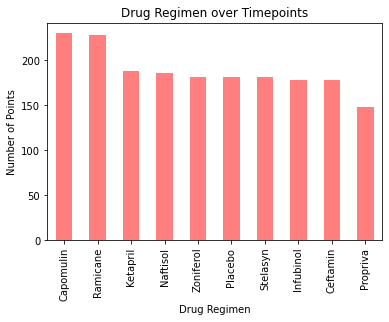

In [79]:
##These are the modified instructions from our instructor - Pandas
# Generate a bar plot that shows the number of total mice for each treatment regimen throughout the course of the study

x_axis = CleanMouse_df["Drug Regimen"]
countofmice = CleanMouse_df["Drug Regimen"].value_counts()

Mouse_Chart = countofmice.plot(kind = 'bar', color ='r', alpha =0.5, title = "Drug Regimen over Timepoints")
#add x,y labels
Mouse_Chart.set(xlabel='Drug Regimen', ylabel='Number of Points')
plt.show()

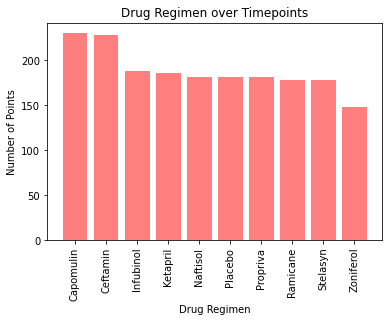

In [80]:
##These are the modified instructions from our instructor - Matplotlib
# Matplotlib's pyplot that shows the number of total mice for each treatment regimen throughout the course of the study.

x_axis2 = np.arange(0,len(mouse_stats1['Drug Regimen']))
x_value = CleanMouse_df['Drug Regimen'].unique()
#had to sort for correct order
sorted_xvalues = x_value.sort()

#still not sure what value the tick locations add to this graph...
xticks = [value for value in x_value]

#for drugname in x_value: (Didn't need this)
 #   xticks.append(drugname)

#create chart
plt.bar(x_value, countofmice, color = "r" , alpha =0.5, align= "center")

#Add labels and title
plt.title("Drug Regimen over Timepoints")
plt.ylabel("Number of Points")
plt.xlabel("Drug Regimen")
plt.xticks(x_value, xticks, rotation = 90)

#display chart
plt.show()



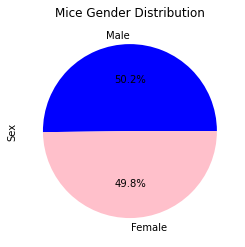

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Mouse_Pie = mouse_metadata.Sex.value_counts().plot(kind = 'pie', colors = ["blue", "pink"], autopct='%1.1f%%', title ="Mice Gender Distribution")

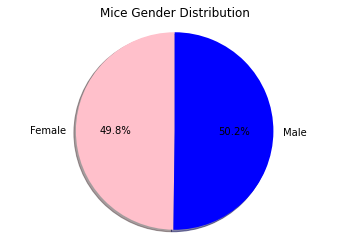

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#calculate number of female mice
femalemice = len(mouse_metadata.loc[mouse_metadata["Sex"] == "Female"])

#calculate number of male mice
malemice = len(mouse_metadata.loc[mouse_metadata["Sex"] == "Male"])


#set up pie specs
labels = ["Female", "Male"]
piesize = [femalemice, malemice]
colors = ["pink", "blue"]

#create pie
plt.pie(piesize, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle=90)
plt.title("Mice Gender Distribution")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [83]:
#From Clean dataframe, find last value for each mouse
#get last value
drug_df = CleanMouse_df.drop_duplicates(['Mouse ID'], keep="last")
drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [93]:
###Ignore this section - I began coding everyhting individually before writing a function ###
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#___________________________Capomulin______________________________________________________
#From new drug_df find only Capomulin values
#Capomulin_df = drug_df.loc[(CleanMouse_df['Drug Regimen'] == "Capomulin")]
#Capomulin_TumorVol = Capomulin_df['Tumor Volume (mm3)']

#Calculate Capomulin Quartiles
#CapomulinQuartiles = Capomulin_TumorVol.quantile([0.25, 0.5, 0.75]) 
#CapomulinLowerQuart = CapomulinQuartiles[0.25]
#CapomulinUpperQuart = CapomulinQuartiles[0.75]

#print(f'Capomulin Lower Quartile for Tumor Volume = {CapomulinLowerQuart}')
#print(f'Capomulin Upper Quartile for Tumor Volume = {CapomulinUpperQuart}')

#Calculate Upper/ Lower Bounds
#CapomulinIQR = CapomulinLowerQuart - CapomulinUpperQuart
#CapomulinUpperBound = CapomulinUpperQuart + 1.5*CapomulinIQR
#CapomulinLowerBound = CapomulinLowerQuart + 1.5*CapomulinIQR
#print(f'Capomulin IQR for Tumor Volume = {CapomulinIQR}')
#print(f'Capomulin tumor values above Q3 = {CapomulinUpperBound} could be outliers')
#print(f'Capomulin tumor values below Q1 = {CapomulinLowerBound} could be outliers')

#Add to box and whisker plot
#fig1, ax = plt.subplots()
#ax.boxplot(Capomulin_df['Tumor Volume (mm3)'])
#________________________Capomuline End__________________________________________________

#___________________________Ramicane______________________________________________________
#From new drug_df find only Ramicane values
#Ramicane_df = CleanMouse_df.loc[(CleanMouse_df['Drug Regimen'] == "Ramicane")]
#Ramicane_TumorVol = Ramicane_df['Tumor Volume (mm3)']

#Calculate Ramicane Quartiles
#amicaneQuartiles = Ramicane_TumorVol.quantile([0.25, 0.5, 0.75]) 
#RamicaneLowerQuart = RamicaneQuartiles[0.25]
#RamicaneUpperQuart = RamicaneQuartiles[0.75]

#print(f'Ramicane Lower Quartile for Tumor Volume = {RamicaneLowerQuart}')
#print(f'Ramicane Upper Quartile for Tumor Volume = {RamicaneUpperQuart}')

#Calculate IQR, Upper/ Lower Bounds
#RamicaneIQR = RamicaneLowerQuart - RamicaneUpperQuart
#RamicaneUpperBound = RamicaneUpperQuart + 1.5*RamicaneIQR
#RamicaneLowerBound = RamicaneLowerQuart + 1.5*RamicaneIQR
#print(f'Ramicane IQR for Tumor Volume = {RamicaneIQR}')
#print(f'Ramicane tumor values above Q3 = {RamicaneUpperBound} could be outliers')
#print(f'Ramicane tumor values below Q1 = {RamicaneLowerBound} could be outliers')

#CapomulinTumorSize = Capomulin_df.loc[Capomulin_df['Tumor Volume (mm3)'] == 'Capomulin', 'Tumor Volume (mm3)']
#test box plot building
#TreatmentLists = [Capomulin_TumorVol, Ramicane_TumorVol ]
#Add to box and whisker plot
#fig1, ax = plt.subplots()
#ax.set_title('Treament Ranges')
#ax.set_ylabel('Final Tumor Volume (mm3)')
#ax.boxplot(TreatmentLists)
#plt.show()
#______________________________Ramicane End ________________________________________________

----------------------------Capomulin--------------------------------------
Capomulin Lower Quartile for Tumor Volume = 32.37735684
Capomulin Upper Quartile for Tumor Volume = 40.1592203
Capomulin IQR for Tumor Volume = 7.781863460000004
Capomulin tumor values above Q3 = 51.83201549 could be outliers
Capomulin tumor values below Q1 = 20.70456164999999 could be outliers
-------------------------------------------------------------------------------
----------------------------Ramicane--------------------------------------
Ramicane Lower Quartile for Tumor Volume = 31.56046955
Ramicane Upper Quartile for Tumor Volume = 40.65900627
Ramicane IQR for Tumor Volume = 9.098536719999998
Ramicane tumor values above Q3 = 54.30681135 could be outliers
Ramicane tumor values below Q1 = 17.912664470000003 could be outliers
-------------------------------------------------------------------------------
----------------------------Infubinol--------------------------------------
Infubinol Lower Quartile

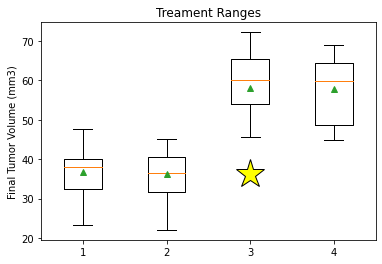

In [95]:
#Define Funciton for IQR
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
TumorVolList =[]
def IQRCalc(Treatments):
    #From new drug_df find values
    TumorVol = drug_df.loc[(CleanMouse_df['Drug Regimen'] == Treatments), 'Tumor Volume (mm3)']
    TumorVolList.append(TumorVol)

    #Calculate  Quartiles
    Quartiles = TumorVol.quantile([0.25, 0.5, 0.75]) 
    LowerQuart = Quartiles[0.25]
    UpperQuart = Quartiles[0.75]
    print(f'----------------------------{Treatments}--------------------------------------')
    print(f'{Treatments} Lower Quartile for Tumor Volume = {LowerQuart}')
    print(f'{Treatments} Upper Quartile for Tumor Volume = {UpperQuart}')

    #Calculate Upper/ Lower Bounds
    IQR = UpperQuart - LowerQuart
    UpperBound = UpperQuart + 1.5*IQR
    LowerBound = LowerQuart - 1.5*IQR
    print(f'{Treatments} IQR for Tumor Volume = {IQR}')
    print(f'{Treatments} tumor values above Q3 = {UpperBound} could be outliers')
    print(f'{Treatments} tumor values below Q1 = {LowerBound} could be outliers')
    print(f'-------------------------------------------------------------------------------')
#Iterate through function to capture values   
for Treatment in Treatments:
    IQRCalc(Treatment)
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest   

#Add to box and whisker plot
fig1, ax = plt.subplots()
ax.set_title('Treament Ranges')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(TumorVolList, flierprops = market, showmeans = True)
market = dict(markerfacecolor = 'yellow', markersize ='30', marker = '*')
plt.show()

## Line and Scatter Plots

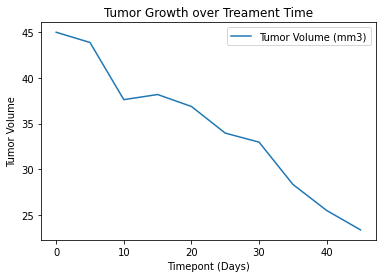

In [87]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Create Dataframe for single mouse-s185 treated with Capomulin Regimen
mouse_s185_df = CleanMouse_df.loc[CleanMouse_df['Mouse ID'] =='s185']

#Find time point and tumor volume
#s185_timepoints = mouse_s185_df["Timepoint"]
#s185_tumorvol = mouse_s185_df["Tumor Volume (mm3)"]
mouse_s185_df.plot.line("Timepoint", "Tumor Volume (mm3)")
plt.title("Tumor Growth over Treament Time")
plt.ylabel("Tumor Volume")
plt.xlabel("Timepont (Days)")
plt.show()

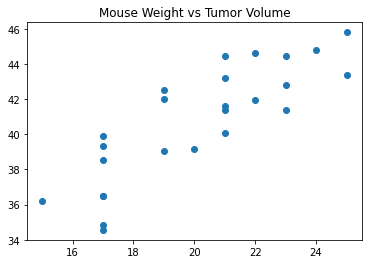

In [88]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#mouse_tumor_new_df = Capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)" :['mean'], "Weight (g)":['mean']})
#create scatter plot
#x_axis_cap = mouse_tumor_new_df['Weight (g)']
#y_axis_cap = mouse_tumor_new_df["Tumor Volume (mm3)"]
#mouse_tumor_new_df.plot.scatter(x_axis_cap['mean'], y_axis_cap)
#plt.title("Mouse Weight vs Tumor Volume")
#plt.show()

Capomulin_df = CleanMouse_df.loc[(CleanMouse_df['Drug Regimen'] == "Capomulin")]
#Pivot data
CapMouse = Capomulin_df.groupby(["Mouse ID"]).mean()
Average_Weight = CapMouse["Weight (g)"]
Average_Tumor = CapMouse["Tumor Volume (mm3)"]

#create scatter plot
plt.scatter(Average_Weight, Average_Tumor)
plt.title("Mouse Weight vs Tumor Volume")
plt.show()



## Correlation and Regression

The Correlation between both factors - Mouse Weight (g) and Tumor Volume (mm3) - is 0.84
(0.8419363424694717, 1.322572243471279e-07)
The r-squared is: 0.7088568047708717


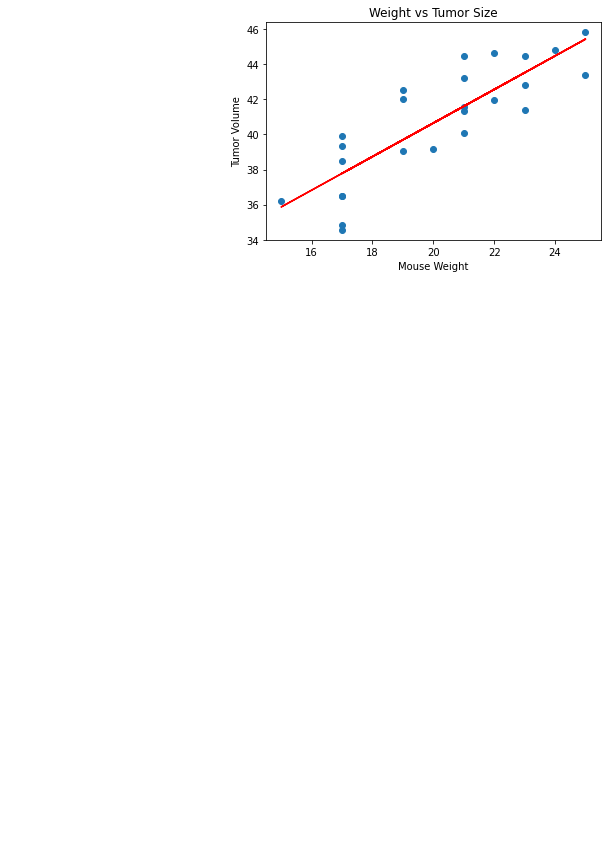

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calcuate correlation
correlation = stats.pearsonr(Average_Weight, Average_Tumor)

#calculate linear regression

#implement into equation
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(Average_Weight, Average_Tumor)
regress_values = Average_Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print final stats
print(f'The Correlation between both factors - Mouse Weight (g) and Tumor Volume (mm3) - is {round(correlation[0],2)}')
print(correlation)
print(f"The r-squared is: {rvalue**2}")

#create scatter plot with regression line displayed
plt.scatter(Average_Weight,Average_Tumor)
plt.plot(Average_Weight,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title('Weight vs Tumor Size')
plt.show()

